In [143]:
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftshift
from pylab import *

In [144]:
alpha = 1 + 260%3
print(alpha)

3


# Problem 1

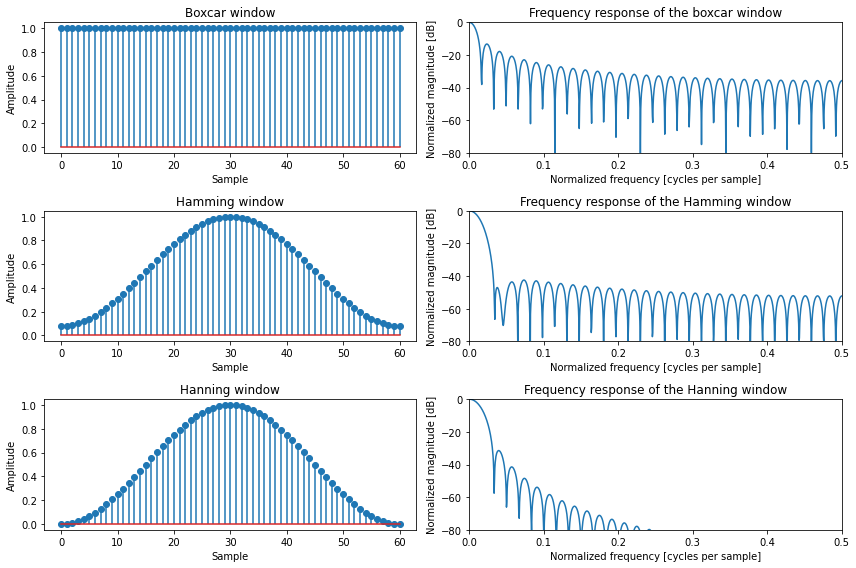

In [145]:
window = sp.windows.boxcar(61)
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.stem(window)
plt.title("Boxcar window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.subplot(3,2,2)
plt.plot(freq, response[int(len(response)/2) : ])
plt.title("Frequency response of the boxcar window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis([0, 0.5, -80, 0])
window = sp.windows.hamming(61)
plt.subplot(3,2,3)
plt.stem(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.subplot(3,2,4)
plt.plot(freq, response[int(len(response)/2) : ])
plt.axis([0, 0.5, -80, 0])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
window = sp.windows.hann(61)
plt.subplot(3,2,5)
plt.stem(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.subplot(3,2,6)
plt.plot(freq, response[int(len(response)/2) :])
plt.axis([0, 0.5, -80, 0])
plt.title("Frequency response of the Hanning window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.tight_layout()
plt.savefig("Q1_1")

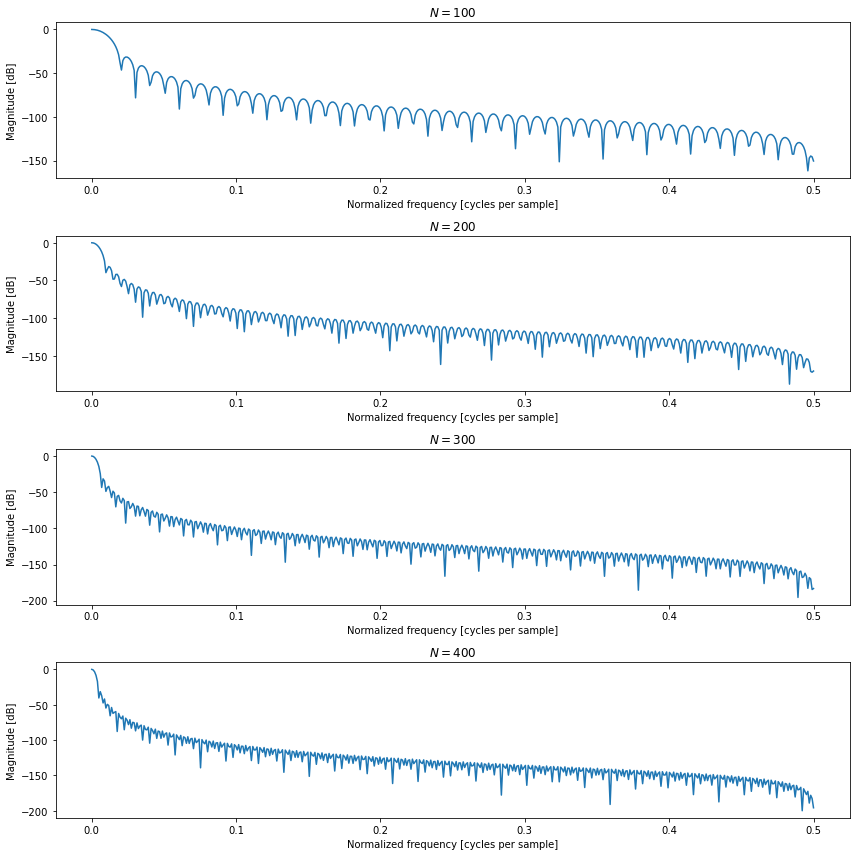

In [146]:
window = sp.windows.hann(100)
plt.figure(figsize=(12,12))
A = fft(window, 1024) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.subplot(4,1,1)
plt.plot(freq, response[int(len(response)/2) :])
plt.title("$N = 100$")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
window = sp.windows.hann(200)
A = fft(window, 1024) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.subplot(4,1,2)
plt.plot(freq, response[int(len(response)/2) :])
plt.title("$N = 200$")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
window = sp.windows.hann(300)
A = fft(window, 1024) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.subplot(4,1,3)
plt.plot(freq, response[int(len(response)/2) :])
plt.title("$N = 300$")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
window = sp.windows.hann(400)
A = fft(window, 1024) / (len(window)/2.0)
freq = np.linspace(0, 0.5, int(len(A)/2))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.subplot(4,1,4)
plt.plot(freq, response[int(len(response)/2) :])
plt.title("$N = 400$")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.tight_layout()
plt.savefig("Q1_2")

# Problem 2

In [147]:
def mfreqz(b,a=1):
    w,h = sp.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    semilogx(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    grid()
   # plt.ylim(-40,0)
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)
    plt.tight_layout()

In [148]:
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = sp.lfilter(b,a,impulse)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')

0.125


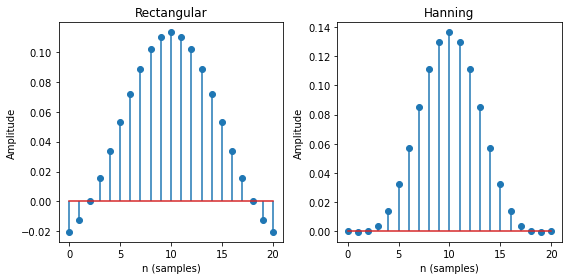

In [149]:
n = 21
w_c = np.pi/(alpha + 1)
f = w_c/(2*pi)
print(f)
hann = sp.firwin(n, cutoff = f, window = "hanning",)
rect = sp.firwin(n, cutoff = f, window = "boxcar")
#Frequency and phase response
figure(figsize=(8,4))
subplot(121)
impz(rect)
title("Rectangular")
subplot(122)
impz(hann)
title("Hanning")
tight_layout()
savefig("Q2_1")

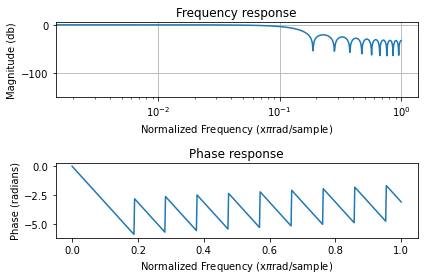

In [150]:
mfreqz(rect)
savefig("Q2_2")

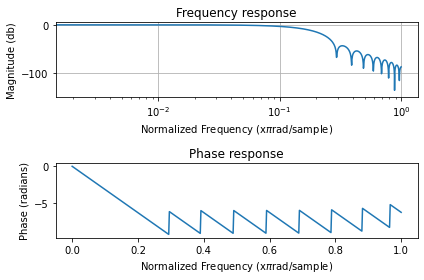

In [151]:
mfreqz(hann)
savefig("Q2_3")

# Problem 3

In [152]:
Fs_instrument, instrument_track = wavfile.read("instru3.wav")
IPython.display.Audio(instrument_track, rate = Fs_instrument)
instrument_track = instrument_track/32767.0
IPython.display.Audio(instrument_track, rate = Fs_instrument)

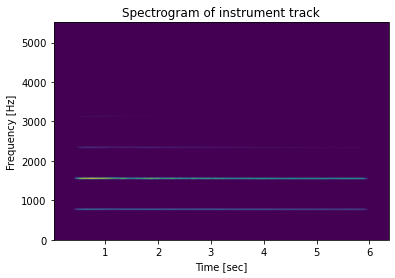

In [153]:
f, t, Sxx = sp.spectrogram(instrument_track, Fs_instrument, window = "hanning",nperseg = 512 ,noverlap = 128)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of instrument track")
plt.savefig("Q3_1")

In [154]:
def mfreqz2(b,a=1):
    w,h = sp.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    plot(Fs_instrument*w/max(w)/2,h_dB)
    xlim(0,1500)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Frequency (Hz)')
    title(r'Frequency response')

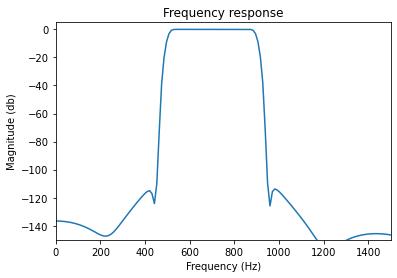

In [155]:
n = 1001
a = sp.firwin(n, cutoff = [500, 900], window = ('blackmanharris'), pass_zero = False, fs = Fs_instrument)
mfreqz2(a)
plt.savefig("Q3_2")

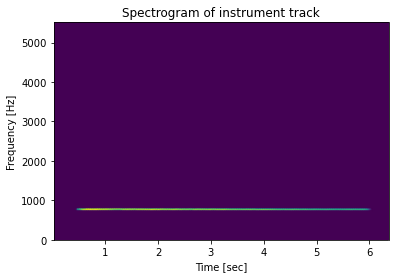

In [156]:
response = sp.lfilter(a,1,instrument_track)
wavfile.write("filtered_instru3.wav",Fs_instrument, (response*32767.0).astype(int16))
f, t, Sxx = sp.spectrogram(response, Fs_instrument, window = "hanning",nperseg = 512 ,noverlap = 128)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of instrument track")
plt.savefig("Q3_3")